# Working with Numpy FFT Results: Scaling and Folding

Adapted from: https://gist.github.com/jedludlow/3919130

Imports
-------

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Create a Test Signal
--------------------
$f_s$ is the sampling frequency, while $f$ is a base frequency for the signal content. We create a signal that contains components at a couple of multiples of this base frequency. Note the amplitudes here since we will be trying to extract those correctly from the FFT later.

In [2]:
f_s = 50.0 # Hz
f = 1.0 # Hz
time = np.arange(0.0, 3.0, 1/f_s)
x = 5 * np.sin(2 * np.pi * f * time) + 2 * np.sin(10 * 2 * np.pi * f * time)

Text(0,0.5,'x')

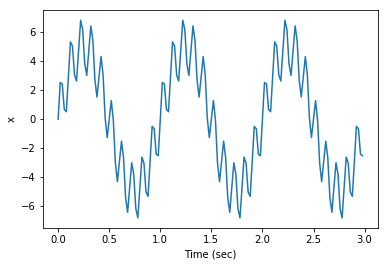

In [3]:
plt.plot(time, x)
plt.xlabel("Time (sec)")
plt.ylabel("x")

Compute the FFT
---------------
The FFT and a matching vector of frequencies

In [5]:
fft_x = np.fft.fft(x)
n = len(fft_x)
freq = np.fft.fftfreq(n, 1/f_s)
print(n)
print(freq)

150
[  0.           0.33333333   0.66666667   1.           1.33333333
   1.66666667   2.           2.33333333   2.66666667   3.
   3.33333333   3.66666667   4.           4.33333333   4.66666667
   5.           5.33333333   5.66666667   6.           6.33333333
   6.66666667   7.           7.33333333   7.66666667   8.
   8.33333333   8.66666667   9.           9.33333333   9.66666667
  10.          10.33333333  10.66666667  11.          11.33333333
  11.66666667  12.          12.33333333  12.66666667  13.
  13.33333333  13.66666667  14.          14.33333333  14.66666667
  15.          15.33333333  15.66666667  16.          16.33333333
  16.66666667  17.          17.33333333  17.66666667  18.
  18.33333333  18.66666667  19.          19.33333333  19.66666667
  20.          20.33333333  20.66666667  21.          21.33333333
  21.66666667  22.          22.33333333  22.66666667  23.
  23.33333333  23.66666667  24.          24.33333333  24.66666667
 -25.         -24.66666667 -24.33333333 -24.  

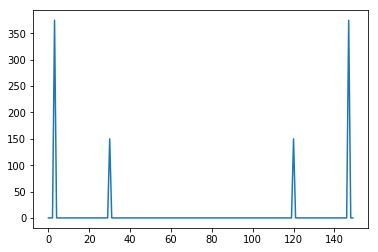

In [6]:
plt.plot(np.abs(fft_x))

Swap Half Spaces
----------------
Note that frequencies in the FFT and the `freq` vector go from zero to some larger positive number then from a large negative number back toward zero. We can swap that so that the DC component is in the center of the vector while maintaining a two-sided spectrum.

In [7]:
fft_x_shifted = np.fft.fftshift(fft_x)
freq_shifted = np.fft.fftshift(freq)

Text(0.5,0,'Frequency (Hz)')

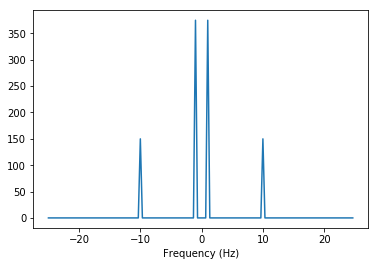

In [8]:
plt.plot(freq_shifted, np.abs(fft_x_shifted))
plt.xlabel("Frequency (Hz)")

Fold Negative Frequencies and Scale
------------------------------
It's actually more common to look at just the first half of the unshifted FFT and frequency vectors and fold all the amplitude information into the positive frequencies. Furthermore, to get ampltude right, we must normalize by the length of the original FFT. Note the factor of $2/n$ in the following which accomplishes both the folding and scaling.

In [11]:
half_n = np.int(np.ceil(n/2.0))
fft_x_half = (2.0 / n) * fft_x[:half_n]
freq_half = freq[:half_n]

Text(0,0.5,'Amplitude')

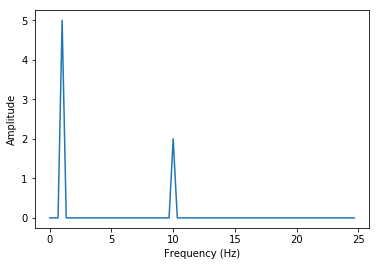

In [13]:
plt.plot(freq_half, np.abs(fft_x_half))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

Now the spectrum contains spikes at the correct amplitudes at only positive frequencies, which are the only ones with physicality.